In [1]:
import torchxrayvision as xrv

In [2]:
model = xrv.models.DenseNet(weights="densenet121-res224-all")

In [1]:
from datasets.mimic_dataset import MimicDataModule
from datasets.utils import VocabularyMimic
from datasets.collators import CollateIndices

import torchxrayvision as xrv

[nltk_data] Downloading package wordnet to /home/danis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
annotation_path = "/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/data/mimic-cxr/annotation.csv"
img_dir = "/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/data/mimic-cxr/images"

vocab = VocabularyMimic(annotation_path=annotation_path)
collate_fn = CollateIndices(vocabulary=vocab)

dm = MimicDataModule(
    img_size=299,
    annotation_path=annotation_path,
    img_dir=img_dir,
    collate_fn=collate_fn
)

dm.setup()

training_data = dm.train_dataloader()

100%|██████████| 15000/15000 [00:04<00:00, 3169.57it/s]


Len of vocab:  8651
Max len of caption:  378
Index for <pad>: [0]


In [3]:
n_pathologies = 0
for i in range(len(training_data.dataset)):
    sample = training_data.dataset[i]
    target = sample["target"]
    n_pathologies += target

In [4]:
n_pathologies / len(training_data.dataset)

tensor(0.5000)

In [5]:
import torchvision
transform = torchvision.transforms.Grayscale(num_output_channels=1)

In [6]:
test_data = dm.test_dataloader()

In [9]:
correct = 0

for batch in training_data:
    images, targets  = transform(batch["image"]), batch["target"]

    pred = model(images)
    pred = pred > 0.5
    pred = pred.sum(dim=1)
    pred = (pred > 0.5).long()

    correct += (pred == targets).float().sum()

accuracy = 100 * correct / len(training_data.dataset)

KeyboardInterrupt: 

In [8]:
accuracy

tensor(50.)

In [9]:
correct

tensor(5250.)

In [6]:
from tqdm import tqdm

In [7]:
pneumothorax = []
wo_pneumothorax = []

for batch in tqdm(training_data):
    images, attributes  = transform(batch["image"]), batch["attributes"]
    pred = model(images)

    N, _ = pred.shape

    for i in range(N):
        is_pneumothorax = attributes[i, 12].item()
        pred_pneumothorax = pred[i, 3].item()

        if is_pneumothorax == 0:
            wo_pneumothorax.append(pred_pneumothorax)
        else:
            pneumothorax.append(pred_pneumothorax)

  0%|          | 0/165 [00:00<?, ?it/s]

100%|██████████| 165/165 [1:08:51<00:00, 25.04s/it]


<AxesSubplot: xlabel='data', ylabel='label'>

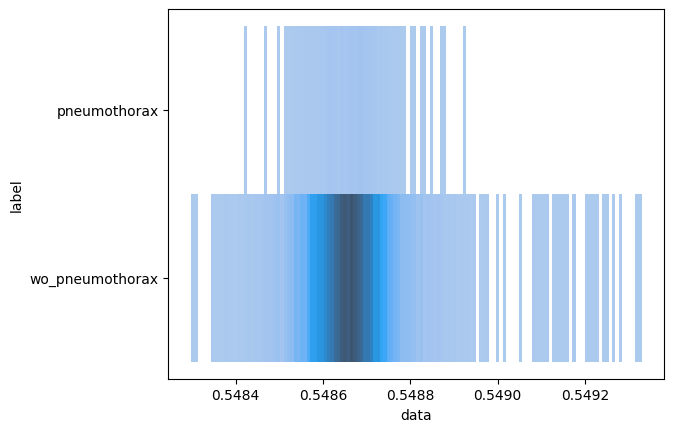

In [17]:

dict_ = {
    "data": pneumothorax + wo_pneumothorax,
    "label": ["pneumothorax"] * len(pneumothorax) + ["wo_pneumothorax"] * len(wo_pneumothorax)
}

import seaborn as sns
import pandas as pd


df = pd.DataFrame.from_dict(dict_)

sns.histplot(df, x="data", y="label")

In [11]:
len(pneumothorax), len(wo_pneumothorax)

(387, 10113)

array([<AxesSubplot: title={'center': 'pneumothorax'}, ylabel='Frequency'>,
       <AxesSubplot: title={'center': 'wo_pneumothorax'}, ylabel='Frequency'>],
      dtype=object)

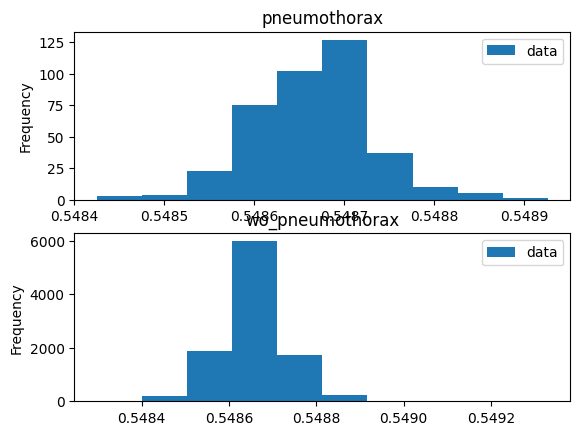

In [13]:
df.plot.hist(by="label")

In [7]:
training_data.dataset[5782]

{'image': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-1.1027,  0.8444,  0.9959,  ..., -2.1179, -2.1020, -2.1131],
          [-1.0761,  0.8542,  1.0052,  ..., -2.1054, -2.1168, -2.1179],
          [-1.0308,  0.9825,  1.0487,  ..., -2.1069, -2.1171, -2.1140]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-0.9978,  0.9928,  1.1476,  ..., -2.0357, -2.0194, -2.0308],
          [-0.9707,  1.0027,  1.1571,  ..., -2.0230, -2.0346, -2.0357],
          [-0.9244,  1.1339,  1.2015,  ..., -2.0244, -2.0349, -2.0317]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

In [15]:
training_data.dataset[0]

{'image': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [ 0.7646,  0.9846,  1.0267,  ...,  0.6853,  0.6333, -0.3025],
          [ 0.7637,  0.8890,  1.0654,  ...,  0.7453,  0.5689, -0.3370],
          [ 0.8773,  1.0189,  0.8606,  ...,  0.6621,  0.6708, -0.3206]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [ 0.9111,  1.1360,  1.1791,  ...,  0.8301,  0.7769, -0.1798],
          [ 0.9102,  1.0383,  1.2187,  ...,  0.8914,  0.7110, -0.2150],
          [ 1.0264,  1.1711,  1.0092,  ...,  0.8063,  0.8153, -0.1983]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

In [12]:
import torchxrayvision as xrv
import skimage, torch, torchvision

# Prepare the image:
img = skimage.io.imread('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/data/mimic-cxr/images/212f55c9-9f286757-fb085dd2-c7e1c269-bd8c5436.jpg')
img = xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
img = img[None, ...] # Make single color channel

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

img = transform(img)
img = torch.from_numpy(img)

# Load model and process image
model = xrv.models.DenseNet(weights="densenet121-res224-all")
outputs = model(img[None,...]) # or model.features(img[None,...]) 

# Print results
dict(zip(model.pathologies,outputs[0].detach().numpy()))

Setting XRayResizer engine to cv2 could increase performance.


{'Atelectasis': 0.726127,
 'Consolidation': 0.6207861,
 'Infiltration': 0.54933876,
 'Pneumothorax': 0.5334953,
 'Edema': 0.55016243,
 'Emphysema': 0.50184005,
 'Fibrosis': 0.5139498,
 'Effusion': 0.7209858,
 'Pneumonia': 0.5278103,
 'Pleural_Thickening': 0.503368,
 'Cardiomegaly': 0.6322302,
 'Nodule': 0.51772857,
 'Mass': 0.5820681,
 'Hernia': 0.12756976,
 'Lung Lesion': 0.55403256,
 'Fracture': 0.5448383,
 'Lung Opacity': 0.72864985,
 'Enlarged Cardiomediastinum': 0.53265786}

In [16]:
import torchxrayvision as xrv
import skimage, torch, torchvision

# Prepare the image:
img = skimage.io.imread( '/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/data/mimic-cxr/images/8155b77f-b18f0fc8-56ec00da-85d917e8-9ef23ccf.jpg')
img = xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
img = img[None, ...] # Make single color channel

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

img = transform(img)
img = torch.from_numpy(img)

# Load model and process image
model = xrv.models.DenseNet(weights="densenet121-res224-all")
outputs = model(img[None,...]) # or model.features(img[None,...]) 

# Print results
dict(zip(model.pathologies,outputs[0].detach().numpy()))

Setting XRayResizer engine to cv2 could increase performance.


{'Atelectasis': 0.88946605,
 'Consolidation': 0.7209674,
 'Infiltration': 0.53634703,
 'Pneumothorax': 0.50981086,
 'Edema': 0.9064338,
 'Emphysema': 0.50148004,
 'Fibrosis': 0.50226974,
 'Effusion': 0.8489134,
 'Pneumonia': 0.6382859,
 'Pleural_Thickening': 0.34959203,
 'Cardiomegaly': 0.8875191,
 'Nodule': 0.3263848,
 'Mass': 0.52556425,
 'Hernia': 0.061662037,
 'Lung Lesion': 0.6583947,
 'Fracture': 0.70790243,
 'Lung Opacity': 0.8768433,
 'Enlarged Cardiomediastinum': 0.8338008}

In [1]:
from helpers import load_experiment

In [ ]:
dm, model = load_experiment(".")